# Assignment 2
## Naive Bayes Classifier

## Student Details (1 Point)
Notes: When submitting, fill your name and ID in this cell.  [1 point]

Lavanya Srinivasan - 1002040671 <br>
Prem Atul Jethwa - 1001861810 <br>
Shubham Sharma - 1001964524 <br>

Make sure to write about any 4-5 line to explain any kind of visualization

Do not to forget to cite any external sources used by you.

Student Who worked on Naive Bayes Classifier: Lavanya Srinivasan - 1002040671

# Remeber to cite any external sources here

# Naive Bayes-

## Programming Assignment Details-

## Preprocessing-
You have textual data that you cannot feed into the model. Therefore, you need to extract features from the text (email) and transform the data. There are techniques to do so, such as Bag of Words, n-grams, Tf-Idf, Word2Vec, CountVectorizer, and many others.

## The Model-
Test train split, using 80% for training, rest for testing. Next you will need to train NB model(Gausian) for classification.

Create the model using training data, predict on the test data, and get the accuracy, plot the confusion matrix.

## Metrics to report- 
You will need to report-
1. Accuracy Score(metrics.accuracy_score)
2. Confusion Matrix(metrics.confusion_matrix) plotted graphically(It needs to be in the final jupyter file which you submit)

## Answer the following questions-
Do not include too much information, it has to be consise. Just your student ids, and the necessary info.
1. Briefly explain your approach, any preprocessing, explain the output, any visualisation for explanation, in same jupyter file. (3-4 paragraphs max)

## Grading-
1. (30 pts) Loading and preprocessing of the data.
2. (30 pts) Creation of correct model(NB), with decent metrics, plotting confusion matrix.
3. (30 pts) Explaining the approach, also explain the(if any) preprocessor which you used.
4. (7 pts) Neatly presented code, with comments, correctly named files, complete report section, and followed the UTA code of conduct.

## Programming Assignment Submission Instructions (2 Points)
Each file should be submitted separately, do not compress them, only one student submits.

Format of file naming:

NB-
'yourLastName_Last4digitsofyourID_NB.ipynb' (Report in markdown cells and code in code cells of Notebook preferred)

## What to submit-
1. Jupyter files(.ipynb)

## Importing necessary libraries

In [2]:
# Required libraries are listed below
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import GaussianNB # Naive Bayes - Gaussian Classifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns  # statistical data visualization
import textfeatures as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saala\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Load the CSV file into a Pandas DataFrame

In [3]:
# loading dataset
df_data = pd.read_csv('C:\Lavanya\MS-Sem4\Data Mining\Assig2\Assig2\dataset_NB.csv',encoding='latin')
df_data.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


## Preprocessing - clean the data using textfeatures package and apply stemming on the same data

In [4]:
# Preprocess the text datat
# Specifying None to include all words
vectorizer = CountVectorizer(stop_words=None) 

In [5]:
# textfeatures packages helps us to extract basic features from the text data as stopwords, hashtags, numeric which helps us to understand the data
df_data = df_data[df_data['email'].notnull()]
tf.clean(df_data,"email","new_email")

# Stemming - removing the inflectional forms of words apperaring in the text
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df_data['new_email'] = df_data['new_email'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
df_data

c:\Users\saala\AppData\Local\Programs\Python\Python39\lib\site-packages\textfeatures\__init__.py:60: FutureWarning: The default value of regex will change from True to False in a future version.
  df[name] = df[name].str.replace('http\S+|www.\S+', '', case=False)
c:\Users\saala\AppData\Local\Programs\Python\Python39\lib\site-packages\textfeatures\__init__.py:61: FutureWarning: The default value of regex will change from True to False in a future version.
  df[name] = df[name].str.replace('[^\w\s]','')
c:\Users\saala\AppData\Local\Programs\Python\Python39\lib\site-packages\textfeatures\__init__.py:62: FutureWarning: The default value of regex will change from True to False in a future version.
  df[name] = df[name].str.replace('\d+', '')


,email,label,new_email
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0,date number number number number number number...
1,martin a posted tassos papadopoulos the greek ...,0,martin post tasso papadopoulo greek sculptor b...
2,man threatens explosion in moscow thursday aug...,0,threaten explos moscow thursday august number ...
3,klez the virus that won t die already the most...,0,klez viru alreadi prolif viru ever klez contin...
4,in adding cream to spaghetti carbonara which ...,0,ad cream spaghetti carbonara effect pasta make...
...,...,...,...
2995,abc s good morning america ranks it the NUMBE...,1,good morn america rank number christma season ...
2996,hyperlink hyperlink hyperlink let mortgage le...,1,hyperlink hyperlink hyperlink mortgag lender c...
2997,thank you for shopping with us gifts for all ...,1,thank shop gift occas free gift number number ...
2998,the famous ebay marketing e course learn to s...,1,famou ebay market cours learn sell complet eba...


## Split the dataset into train and test sets with an 80/20 split using train_test_split

In [6]:
# Split the data into train and test sets
train_data, test_data, train_labels, test_labels = train_test_split(df_data['new_email'], df_data['label'], test_size=0.2, random_state=42)

## Tokenize the text and convert in to a bag of Words representation

In [7]:
# Tokenize the text and convert it to a bag-of-words representation
train_corpus = train_data.astype(str).apply(lambda x: ' '.join(word_tokenize(x.lower())))
test_corpus = test_data.apply(lambda x: ' '.join(word_tokenize(x.lower())))
# Extract features from the text data using CountVectorizer
train_bag_of_words = vectorizer.fit_transform(train_corpus)
test_bag_of_words = vectorizer.transform(test_corpus)

## Train the Naive Bayes Gaussian classifier on the training set

In [8]:
# In Gaussian, we assume the input fetures follows normal distribution and independent of one another. 
# Create a Gaussian Classifier
classifier = GaussianNB()

# model is trained using the training sets
classifier.fit(train_bag_of_words.toarray(), train_labels)

GaussianNB()

In [9]:
# Make predictions on the test set and evaluate the model
predictions = classifier.predict(test_bag_of_words.toarray())
# Calculate the accuracy of the model using accuracy_score
accuracy = accuracy_score(test_labels, predictions)
# Confusion matrix
confusion_mat = confusion_matrix(test_labels, predictions)

print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_mat)

Accuracy: 0.9583333333333334
Confusion Matrix:
 [[489  11]
 [ 14  86]]


Gaussian NB accuracy = 95.8%

<Axes: >

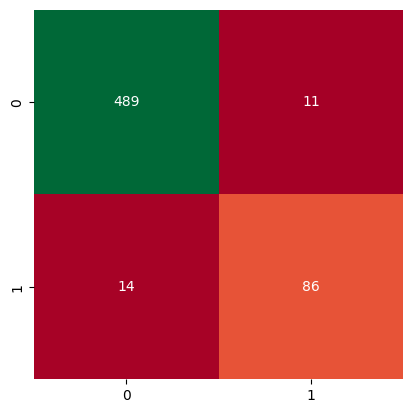

In [10]:
# confusion matrix graphics
sns.heatmap(confusion_mat, square=True, annot=True, cmap='RdYlGn', fmt='d', cbar=False)

## Approach:
1. Loaded the dataset using Pandas Dataframe
2. Preprocessing - In this approach, We used textfeatures packages to clean the email data and applied stemming on top it. Later extracted the features from text data using CountVectorizer by tokenizing the text and converted it into bag of word representaiton.
3. Splitted the dataset into train and test by 80/20 using train_test_split from sklearn
4. Train the Naive Bayes Gaussian classifier on training set, In gaussian we assume the input fetures follows normal distribution and independent of one another.
5. Based on this wil be calculating the accuracy and ploting the confusion matrix.

## Team Contribution:
1. Naive Bayes Gaussian Classifier - Lavanya Srinivasan
2. Decision Tree - Prem Atul Jethwa 
3. KNN - Shubham Sharma

## References:

1. https://www.geeksforgeeks.org/how-to-split-the-dataset-with-scikit-learns-train_test_split-function/
2. https://www.pluralsight.com/guides/building-features-from-text-data
3. https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html